# Credit Card Fraud Detection

## Using Logistic Regression 

In [2]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [9]:
# Loading dataset
df=pd.read_csv("dataset.csv")

# displaying first few rows
df.head()

,TransactionID,TransactionAmount,TransactionTime,MerchantCategory,CustomerAge,CustomerGender,CustomerIncome,TransactionLocation,PreviousFraudCount,Fraud
0,1,3200.74,7.15,Online,74,Female,192470,Rural,2,1
1,2,134.80,49.37,Online,42,Male,148426,Urban,1,0
2,3,1382.40,39.20,Travel,40,Male,157840,Urban,0,0
3,4,1123.82,70.40,Restaurant,52,Female,183570,Rural,0,0
4,5,3684.99,25.82,Restaurant,42,Female,174743,Rural,4,0


### Exploratory Data Analysis

In [10]:
# summary info
df.info()

# summary statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TransactionID        1000 non-null   int64  
 1   TransactionAmount    1000 non-null   float64
 2   TransactionTime      1000 non-null   float64
 3   MerchantCategory     1000 non-null   object 
 4   CustomerAge          1000 non-null   int64  
 5   CustomerGender       1000 non-null   object 
 6   CustomerIncome       1000 non-null   int64  
 7   TransactionLocation  1000 non-null   object 
 8   PreviousFraudCount   1000 non-null   int64  
 9   Fraud                1000 non-null   int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 78.3+ KB


,TransactionID,TransactionAmount,TransactionTime,CustomerAge,CustomerIncome,PreviousFraudCount,Fraud
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,2567.684200,35.924180,49.000000,112072.660000,2.510000,0.050000
std,288.819436,1436.217967,20.406565,18.149805,52071.798284,1.690786,0.218054
min,1.000000,12.030000,0.200000,18.000000,20048.000000,0.000000,0.000000
25%,250.750000,1326.537500,18.770000,33.750000,66671.750000,1.000000,0.000000
50%,500.500000,2631.220000,36.455000,49.000000,111575.500000,3.000000,0.000000
75%,750.250000,3783.997500,53.430000,64.000000,158903.500000,4.000000,0.000000
max,1000.000000,4999.540000,71.970000,80.000000,199967.000000,5.000000,1.000000


In [11]:
# check for missing values
df.isnull().sum()

TransactionID          0
TransactionAmount      0
TransactionTime        0
MerchantCategory       0
CustomerAge            0
CustomerGender         0
CustomerIncome         0
TransactionLocation    0
PreviousFraudCount     0
Fraud                  0
dtype: int64

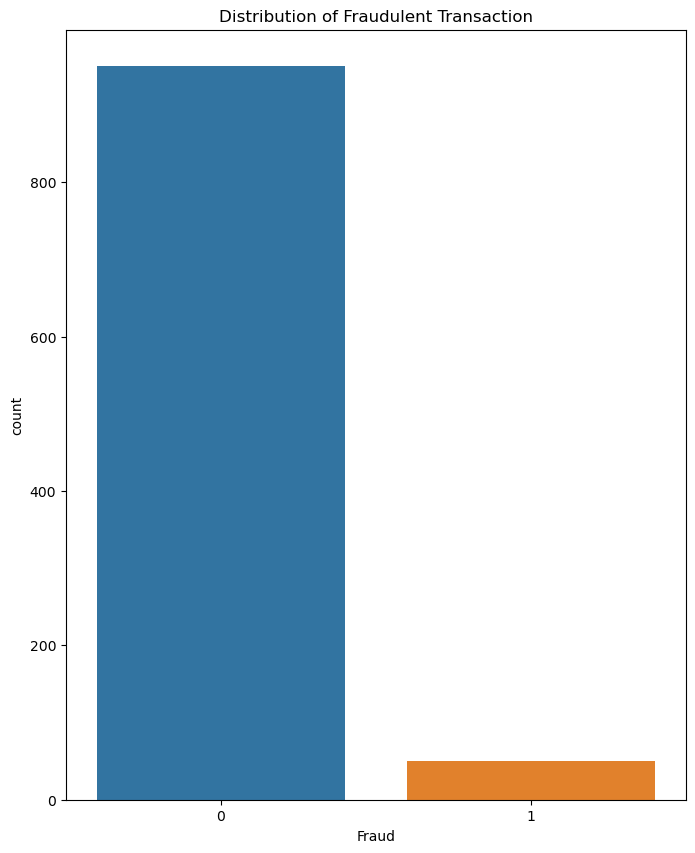

In [12]:
# Distribution of trget variable
plt.figure(figsize=(8,10))
sns.countplot(x='Fraud',data=df)
plt.title("Distribution of Fraudulent Transaction")
plt.show()


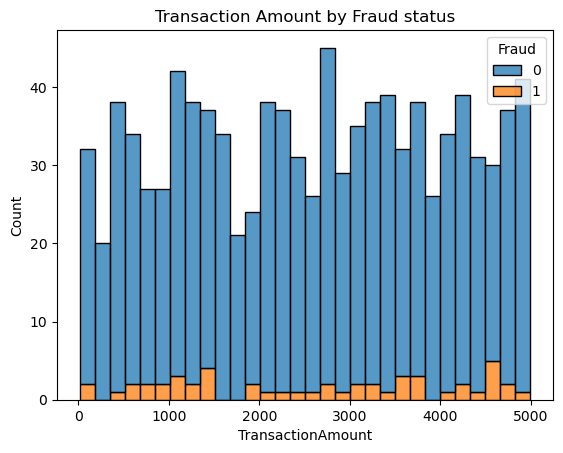

In [13]:
# Distribution of Transaction Amount by Fraud status

sns.histplot(data=df,x='TransactionAmount',hue='Fraud',multiple='stack',bins=30)
plt.title("Transaction Amount by Fraud status")
plt.show()

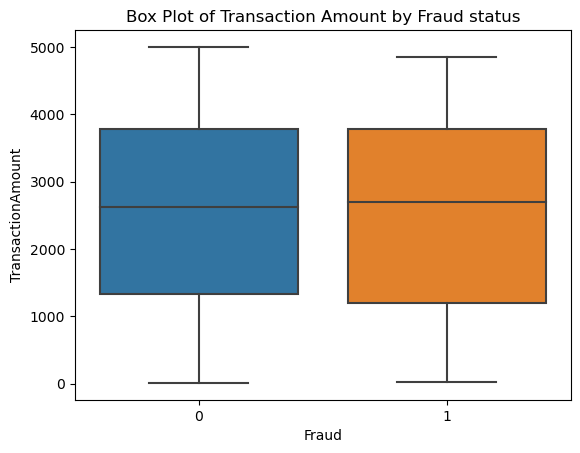

In [14]:
# BoxPlot for Transaction Amount by Fraud status

sns.boxplot(data=df,x='Fraud',y="TransactionAmount")
plt.title("Box Plot of Transaction Amount by Fraud status")
plt.show()

C:\Users\sriku\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


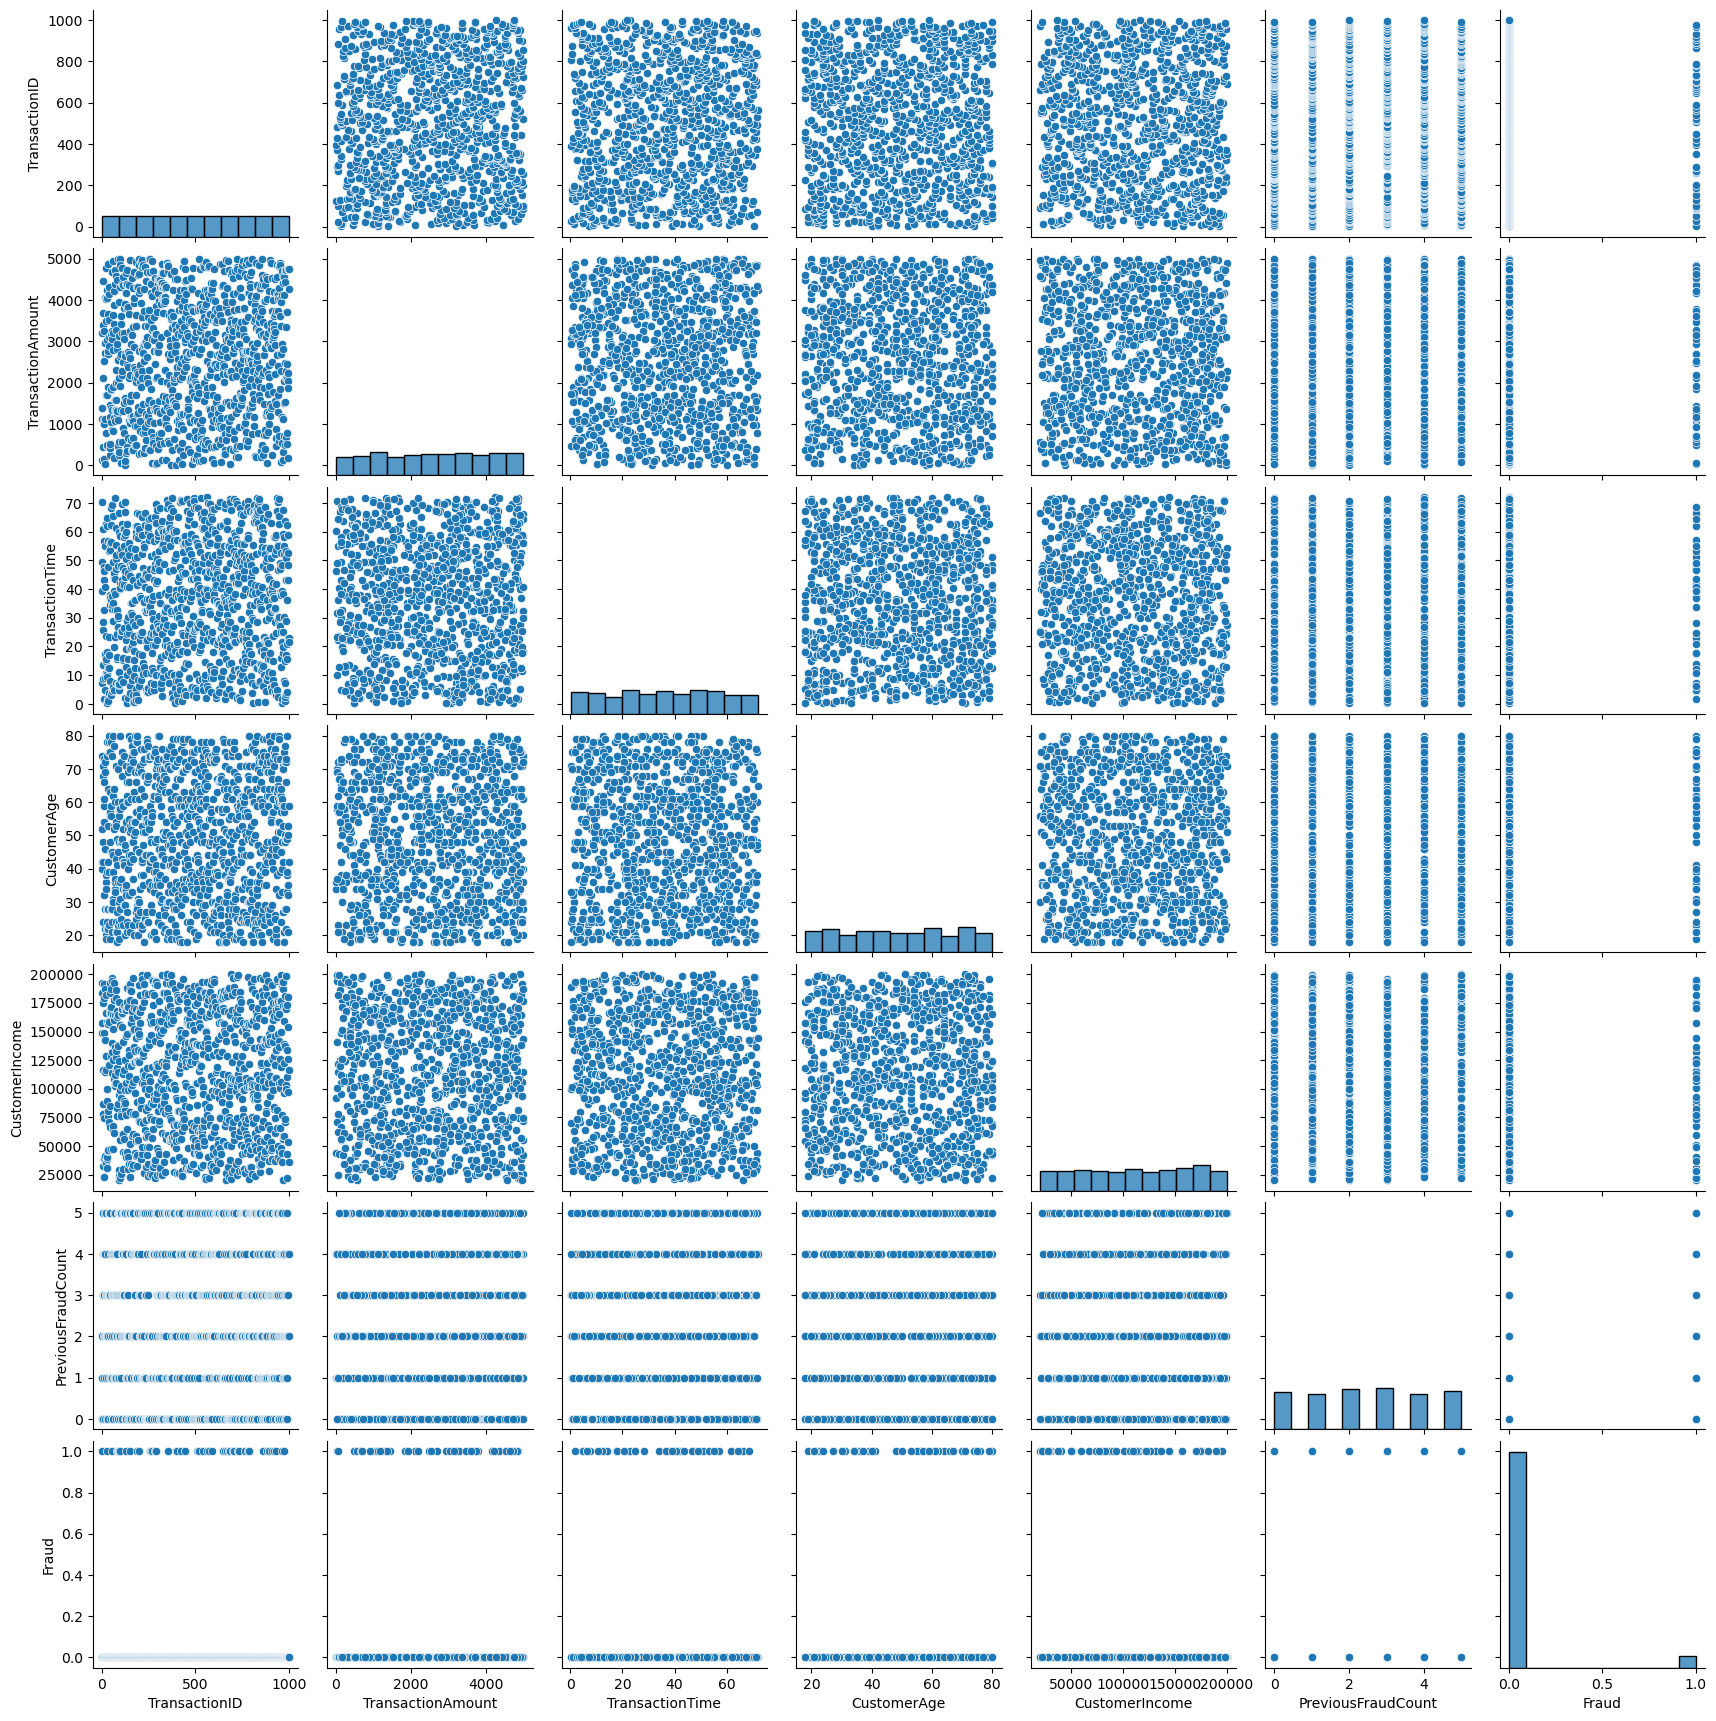

In [17]:
# pairPlot
sns.pairplot(df)
plt.show()

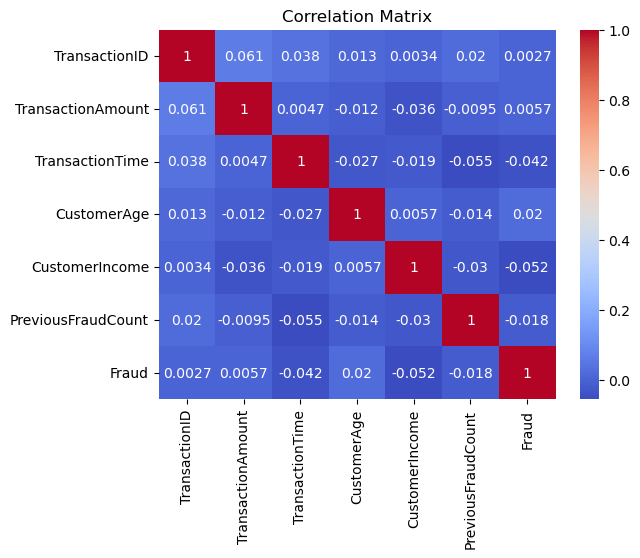

In [20]:
# Correlation matrix
num_cols=list()

for column in df.columns:
    if(df[column].dtype!=object):
        num_cols.append(column)

        
corr_matrix=df[num_cols].corr()
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()
    


### Data Preprocessing

In [21]:
# Encode categorical Data
label_encoders={}
for column in ['MerchantCategory','CustomerGender','TransactionLocation']:
    le=LabelEncoder()
    df[column]=le.fit_transform(df[column])
    label_encoders[column]=le

### Model

In [22]:
# Features and target
x=df.drop(['TransactionID','Fraud'],axis=1)
y=df['Fraud']

x.head()

,TransactionAmount,TransactionTime,MerchantCategory,CustomerAge,CustomerGender,CustomerIncome,TransactionLocation,PreviousFraudCount
0,3200.74,7.15,0,74,0,192470,0,2
1,134.80,49.37,0,42,1,148426,2,1
2,1382.40,39.20,3,40,1,157840,2,0
3,1123.82,70.40,1,52,0,183570,0,0
4,3684.99,25.82,1,42,0,174743,0,4


In [32]:
# spliting data into test and training set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [40]:
# Feature scaling
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)  #it is an ndarray not dataframe
x_test=scaler.transform(x_test)

In [34]:
# Logistic regression
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression()
logreg.fit(x_train,y_train)

LogisticRegression()

Logistic Regression Accuracy : 95.00

Logistic Regerssion classification Report :
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       285
           1       0.00      0.00      0.00        15

    accuracy                           0.95       300
   macro avg       0.47      0.50      0.49       300
weighted avg       0.90      0.95      0.93       300



C:\Users\sriku\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sriku\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sriku\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


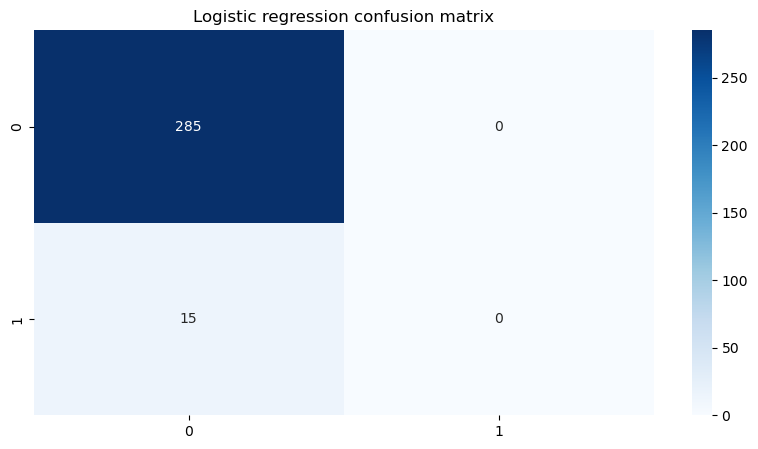

In [35]:
# accuracy and performance of model

logreg_pred=logreg.predict(x_test)
logreg_accuracy=accuracy_score(y_test,logreg_pred)

print(f"Logistic Regression Accuracy : {logreg_accuracy*100:.2f}")
print("\nLogistic Regerssion classification Report :")
print(classification_report(y_test,logreg_pred))

# confusion matrix

plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test,logreg_pred),annot=True,fmt='d',cmap='Blues')
plt.title("Logistic regression confusion matrix")
plt.show()

## KNN Algorithm

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
# Model training 
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

K-Nearest Neighbors Accuracy : 95.00

K-Nearest Neighbors Classification report :
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       285
           1       0.00      0.00      0.00        15

    accuracy                           0.95       300
   macro avg       0.47      0.50      0.49       300
weighted avg       0.90      0.95      0.93       300



C:\Users\sriku\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sriku\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sriku\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


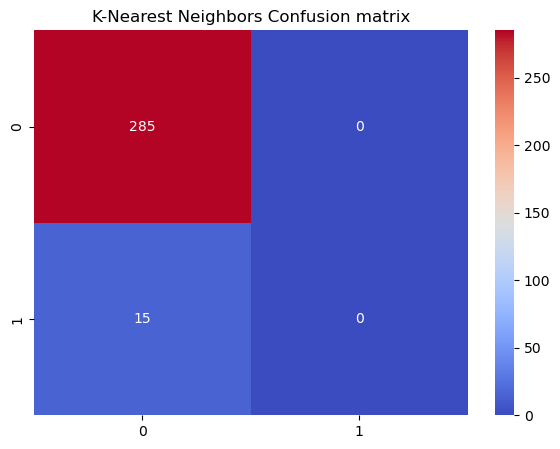

In [38]:
# Model performance and accuracy
knn_pred=knn.predict(x_test)
knn_accuracy=accuracy_score(y_test,knn_pred)

print(f"K-Nearest Neighbors Accuracy : {knn_accuracy*100:.2f}")
print("\nK-Nearest Neighbors Classification report :")
print(classification_report(y_test,knn_pred))

# Confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test,knn_pred),annot=True,fmt='d',cmap='coolwarm')
plt.title("K-Nearest Neighbors Confusion matrix")
plt.show()

## Decision Tree algorithm

In [41]:
from sklearn.tree import DecisionTreeClassifier  #for regression use this class "DecisionTreeRegressor"

In [42]:
# Model creatioon and Training
decision_tree=DecisionTreeClassifier()
decision_tree.fit(x_train,y_train)

DecisionTreeClassifier()

Decision Tree Accuracy : 89.00

Decision Classification report :
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       285
           1       0.00      0.00      0.00        15

    accuracy                           0.89       300
   macro avg       0.47      0.47      0.47       300
weighted avg       0.90      0.89      0.89       300



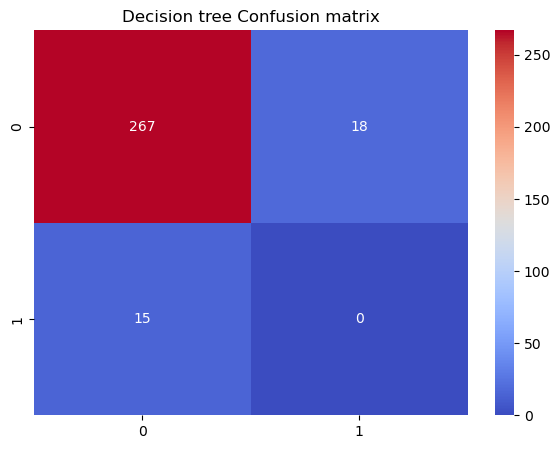

In [43]:
# Model performance and accuracy
decision_tree_pred=decision_tree.predict(x_test)
decision_tree_accuracy=accuracy_score(y_test,decision_tree_pred)

print(f"Decision Tree Accuracy : {decision_tree_accuracy*100:.2f}")
print("\nDecision Classification report :")
print(classification_report(y_test,decision_tree_pred))

# Confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test,decision_tree_pred),annot=True,fmt='d',cmap='coolwarm')
plt.title("Decision tree Confusion matrix")
plt.show()

## Support Vector Machine Algorithm

In [44]:
from sklearn.svm import SVC

In [45]:
# Model creation and training
svm=SVC()
svm.fit(x_train,y_train)

SVC()

SVM Accuracy :95.00

SVM Classification  report :
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       285
           1       0.00      0.00      0.00        15

    accuracy                           0.95       300
   macro avg       0.47      0.50      0.49       300
weighted avg       0.90      0.95      0.93       300



C:\Users\sriku\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sriku\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sriku\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


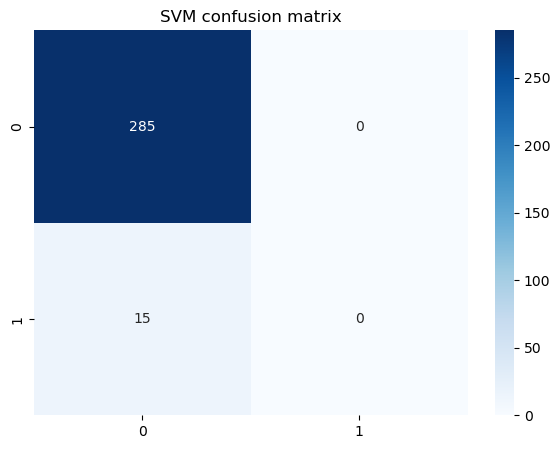

In [52]:
# Model performance and accuracy
svm_pred=svm.predict(x_test)
svm_accuracy=accuracy_score(y_test,svm_pred)

print(f"SVM Accuracy :{svm_accuracy*100:.2f}")
print("\nSVM Classification  report :")
print(classification_report(y_test,svm_pred))

# Confusion matrix 
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test,svm_pred),annot=True,fmt='d',cmap='Blues')
plt.title("SVM confusion matrix")
plt.show()

## Model Comparsion

In [58]:
model_accuracies={
    'Logistic Regression ':logreg_accuracy,
    'K-nearest Neighbors ':knn_accuracy,
    'Decision Tree ':decision_tree_accuracy,
    'Support Vector Machine ':svm_accuracy
}

for model,accuracy in model_accuracies.items():
    print(f"{model}Accuracy : {accuracy}")

Logistic Regression Accuracy : 0.95
K-nearest Neighbors Accuracy : 0.95
Decision Tree Accuracy : 0.89
Support Vector Machine Accuracy : 0.95
